In [1]:
import h5py
import numpy 
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# look at example file, this is what we need to get to
with h5py.File('/global/cscratch1/sd/chihway/TXPipe_old/data/example/inputs/star_catalog.hdf5') as f:

    # you can check what is in the file like this
    print(f.keys())
    print(f['stars'].keys())

<KeysViewHDF5 ['provenance', 'stars']>
<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'id', 'mag_g', 'mag_i', 'mag_r', 'mag_u', 'mag_y', 'mag_z', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra', 'tract']>


Compare with the columns that exist in the original DES file: https://des.ncsa.illinois.edu/releases/y1a1/key-catalogs/key-psf

In [9]:
!cp ../inputs/DES_psf_catalog_original.hdf5 ../inputs/DES_psf_catalog.hdf5

In [10]:
# this is how we open an h5 file
with h5py.File('../inputs/DES_psf_catalog.hdf5','a') as f:

    # you can check what is in the file like this
    print(f.keys())
    print(f['stars'].keys())
    print(np.array(f['stars/id']))
    
    N = len(np.array(f['stars/id']))
    np.random.seed(100)
    mag_add = np.random.normal(loc=18.0, scale=2.0, size=N)
    mag_add[mag_add<1] = 1
    
    # now let's try to rename the columns
    for band in ['g','r','i','z','y']:
        f['stars/'+band+'_mag'][:] = mag_add
        f['stars/mag_'+band] = f['stars/'+band+'_mag']
        del f['stars/'+band+'_mag']
        print(np.array(f['stars/mag_'+band]))
    
    f['stars/calib_psf_reserved'] = np.ones(len(f['stars/mag_g'])).astype('int')
    f['stars/calib_psf_used'] = np.zeros(len(f['stars/mag_g'])).astype('int')
    f['stars/extendedness'] = np.zeros(len(f['stars/mag_g']))
    
    
    # print again to see if the names are changed
    print(f['stars'].keys())


<KeysViewHDF5 ['stars']>
<KeysViewHDF5 ['dec', 'g_mag', 'i_mag', 'id', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'r_mag', 'ra', 'u_mag', 'y_mag', 'z_mag']>
[1 1 1 ... 1 1 1]
[14 18 20 ... 16 17 15]
[14 18 20 ... 16 17 15]
[14 18 20 ... 16 17 15]
[14 18 20 ... 16 17 15]
[14 18 20 ... 16 17 15]
<KeysViewHDF5 ['calib_psf_reserved', 'calib_psf_used', 'dec', 'extendedness', 'id', 'mag_g', 'mag_i', 'mag_r', 'mag_y', 'mag_z', 'measured_T', 'measured_e1', 'measured_e2', 'model_T', 'model_e1', 'model_e2', 'ra', 'u_mag']>


In [13]:
!cp ../inputs/DES_psf_catalog.hdf5 /global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/DES_psf_catalog.hdf5

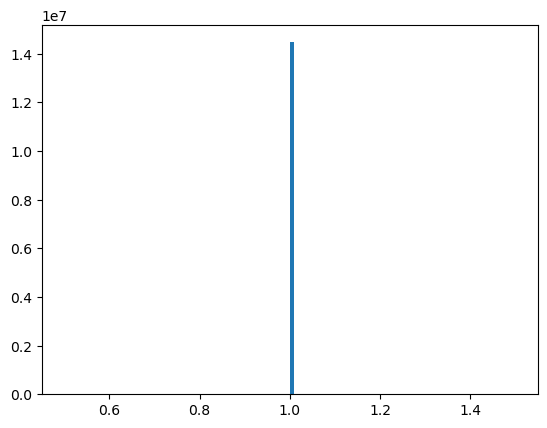

In [11]:
with h5py.File('../inputs/DES_psf_catalog_original.hdf5','a') as f:
    mplot.hist(np.array(f['stars/y_mag']), bins=100)

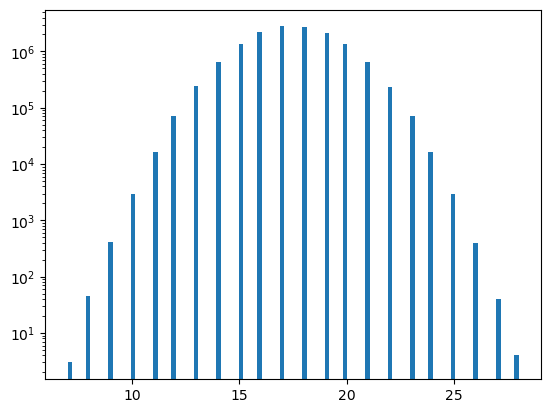

In [12]:
with h5py.File('../inputs/DES_psf_catalog.hdf5','a') as f:
    mplot.hist(np.array(f['stars/mag_y']), bins=100)
    mplot.yscale('log')

In [19]:
# check binned star catalog

In [5]:
with h5py.File('../outputs/binned_star_catalog.hdf5','a') as f:
    print(len(f['stars/bin_bright/ra'][:]))

14468760
